Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading and importing Dataset

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df=df.iloc[:,3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Visualization


Univariate analysis

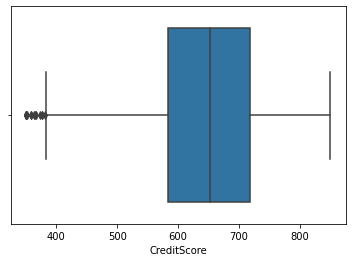

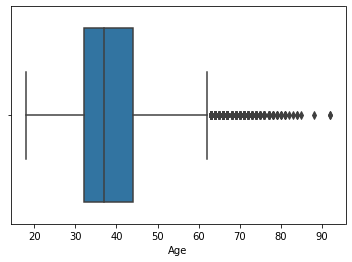

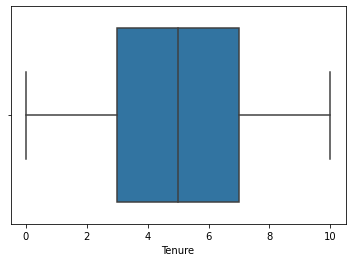

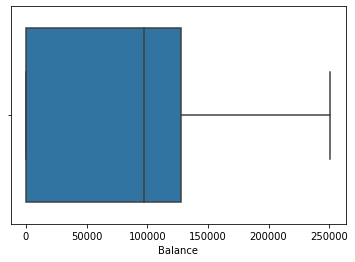

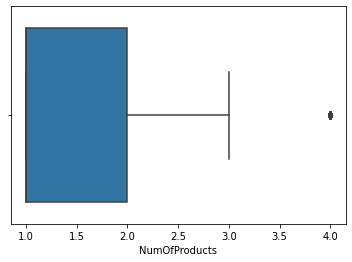

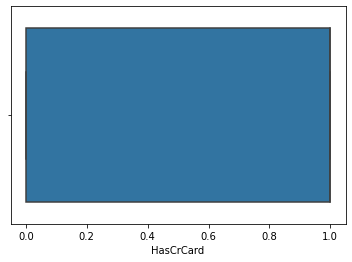

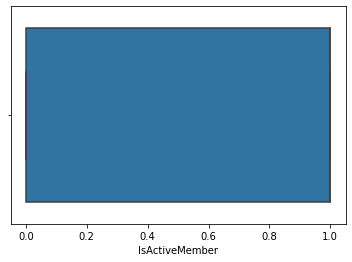

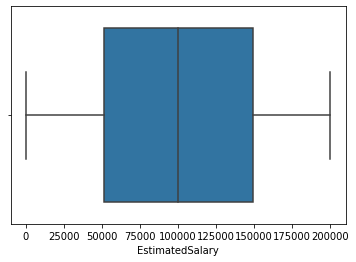

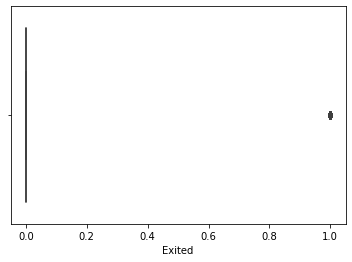

In [5]:
for col in df.columns:
  if(df.dtypes[col]=='int64' or df.dtypes[col]=='float64'):
    sns.boxplot(x=df[col]).set(xlabel=col)
    plt.show()

2.Bivariate Analysis

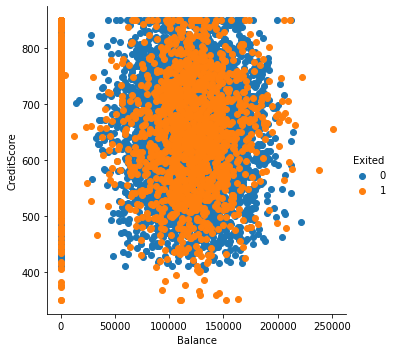

In [6]:
sns.FacetGrid(df,hue='Exited',height=5).map(plt.scatter,"Balance","CreditScore").add_legend()
plt.show()

3.Multivariate

In [ ]:
sns.pairplot(df, hue='Exited', height=2)

Descriptive Analysis

In [ ]:
df.describe()

Handling Missing Values

since there is no null values this task is skipped

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Finding and Removing the Outliers

Outliers are found using the Univariate BOXPLOT from Task 3


In [ ]:
CreditsMedian=df.loc[df['CreditScore']<400,'CreditScore'].median()
ProdMedian=df.loc[df['NumOfProducts']>=3.5,'NumOfProducts'].median()
df.loc[df.CreditScore<400,'CreditScore']=np.nan
df.fillna(CreditsMedian,inplace=True)
df.loc[df.NumOfProducts>3,'NumOfProducts']=np.nan
df.fillna(ProdMedian,inplace=True)


Label Encoding(Categorical)

In [ ]:
labelencoder=LabelEncoder()
df['Geography']=labelencoder.fit_transform(df['Geography'])
df['Gender']=labelencoder.fit_transform(df['Gender'])

Seperating Dependent and Independent Values

In [ ]:
ind=df.iloc[:,:-1]
dep=df.iloc[:,-1:]

Scaling the Independent Variables

In [ ]:
nm=MinMaxScaler()
N_ind=nm.fit_transform(ind)

Splitting the train and test data

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(N_ind,dep,test_size=0.3)
print(xtrain,xtest,ytrain,ytest)